### Agenda
- In the lecture session, we have seen
    - Fundamentals of Time Series Analysis
    - Smoothing Techniques
        - Simple Moving Average
        - Weighted Moving Average
        - Exponential Moving Average
    - Forcasting models
        - Moving average models
        - Holts-Winter
        - Arima
- In the lab we work on
    - Data preparation for time series analysis
    - Data Decomposition into trend, seasonality and randomness
    - Forcasting with various time series models

### Problem Statement


A multinational e-commerce company idenified a segment of products which are showing less sales when comapred to other class of products. As the prices of those products are volatile periodically based on demand and other economic factors, if they quote right price on time then the chance of incrasing sales is very high. 

They want to understand what is right price to quote on a given period for each product which will help them to increase the sales. The given data contains historical data of a product. Perform time series analysis and forecast the price.

In [1]:
# Load the libraries
import pandas as pd
import numpy as np

In [2]:
# Reading the data 

time = pd.read_csv('TimeSeries.csv')

In [3]:
# check how many rows and columns
time.shape


(19657, 3)

In [4]:
# check the top 5 records

time.head()

,SKU,Price,Date
0,1,129.98,01-06-2009
1,2,57.96,01-06-2009
2,3,84.38,08-12-2009
3,1,159.96,08-12-2009
4,2,56.98,08-12-2009


In [5]:
# check the data information
time.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19657 entries, 0 to 19656
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SKU     19657 non-null  int64  
 1   Price   19657 non-null  float64
 2   Date    19657 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 460.8+ KB


In [6]:
# check the frequency of SKU

time.value_counts('SKU')

SKU
1    6997
2    6812
3    5848
dtype: int64

In [7]:
# check the data types
time.dtypes


SKU        int64
Price    float64
Date      object
dtype: object

### Basic Data preprocessing

In [8]:
#Convert 'SKU' variable to category
time['SKU'] =  time['SKU'].astype('category')      

# Convert date variable into Date format 
time['date'] = pd.to_datetime(time['Date'],format='%d-%m-%Y') 

In [9]:
time.dtypes

SKU            category
Price           float64
Date             object
date     datetime64[ns]
dtype: object

In [10]:
# check the summary of the data 
time.describe()

,Price
count,19657.000000
mean,80.625467
std,37.894582
min,20.270000
25%,50.150000
50%,70.970000
75%,105.000000
max,999.000000


In [11]:
# checking how many rows are with price:999
time[time.Price==999]


,SKU,Price,Date,date
3441,3,999.0,24-08-2010,2010-08-24


In [12]:
# removing the records with price more  than 999
time=time[time.Price!=999]
time

,SKU,Price,Date,date
0,1,129.98,01-06-2009,2009-06-01
1,2,57.96,01-06-2009,2009-06-01
2,3,84.38,08-12-2009,2009-12-08
3,1,159.96,08-12-2009,2009-12-08
4,2,56.98,08-12-2009,2009-12-08
...,...,...,...,...
19652,2,39.68,09-08-2013,2013-08-09
19653,3,78.00,09-08-2013,2013-08-09
19654,3,79.62,09-08-2013,2013-08-09
19655,3,79.62,09-08-2013,2013-08-09


In [107]:
# Let us focus on speciffic product. So, filter the data only for one particular SKU
time =time[time.SKU==3]
time.shape
time.describe()


,Price
count,5847.000000
mean,73.142588
std,17.943083
min,39.840000
25%,60.000000
50%,72.250000
75%,83.750000
max,379.800000


In [109]:
time.head()

,SKU,Price,Date,date
2,3,84.38,08-12-2009,2009-12-08
11,3,115.98,01-06-2009,2009-06-01
22,3,115.98,02-06-2009,2009-06-02
23,3,84.38,09-12-2009,2009-12-09
35,3,115.98,03-06-2009,2009-06-03


In [110]:
# As all records are from the same SKU, let us delete this variable
time.drop(['SKU','Date'],axis=1)


,Price,date
2,84.38,2009-12-08
11,115.98,2009-06-01
22,115.98,2009-06-02
23,84.38,2009-12-09
35,115.98,2009-06-03
...,...,...
19645,79.62,2013-08-09
19651,79.62,2013-08-09
19653,78.00,2013-08-09
19654,79.62,2013-08-09


In [111]:
time.head(20)

,SKU,Price,Date,date
2,3,84.38,08-12-2009,2009-12-08
11,3,115.98,01-06-2009,2009-06-01
22,3,115.98,02-06-2009,2009-06-02
23,3,84.38,09-12-2009,2009-12-09
35,3,115.98,03-06-2009,2009-06-03
40,3,84.38,10-12-2009,2009-12-10
53,3,115.98,04-06-2009,2009-06-04
64,3,84.38,11-12-2009,2009-12-11
71,3,115.98,05-06-2009,2009-06-05
78,3,84.38,12-12-2009,2009-12-12


In [112]:
# For time series the data dates should always be in order

In [113]:
# sort the data in the descending order 

sorted_data = time.sort_values('date',ascending=True) 

In [114]:
# GroupBy date column

unique_data = pd.DataFrame(sorted_data.groupby(['date'],as_index=False)['Price'].min())

In [115]:
unique_data.head(100)

,date,Price
0,2009-04-15,58.65
1,2009-04-16,58.65
2,2009-04-17,58.65
3,2009-04-18,79.64
4,2009-05-30,115.98
...,...,...
95,2009-11-05,84.38
96,2009-11-06,84.38
97,2009-11-07,84.38
98,2009-11-08,84.38


In [116]:
# get the min and max of data 
minDate = min(unique_data.date)
maxDate = max(unique_data.date)
print(minDate)
print(maxDate)

2009-04-15 00:00:00
2013-12-02 00:00:00


In [117]:
# Creating the data sequence
seq = pd.DataFrame(pd.date_range(minDate,maxDate))

In [118]:
# Look at the head of seq

seq.head(20)

,0
0,2009-04-15
1,2009-04-16
2,2009-04-17
3,2009-04-18
4,2009-04-19
5,2009-04-20
6,2009-04-21
7,2009-04-22
8,2009-04-23
9,2009-04-24


In [119]:
# adding the column name 

seq.columns=['Date']

In [120]:
unique_data.columns

Index(['date', 'Price'], dtype='object')

In [121]:
# Full outer join on both the dataframes 

data_all = pd.merge(seq,unique_data,how='outer',left_on=['Date'],right_on=['date'],sort=True)

In [122]:
# verifying top 5 records to check if the merging done correctly or not 
data_all.head()


,Date,date,Price
0,2009-04-15,2009-04-15,58.65
1,2009-04-16,2009-04-16,58.65
2,2009-04-17,2009-04-17,58.65
3,2009-04-18,2009-04-18,79.64
4,2009-04-19,NaT,NaN


In [123]:
data_all = data_all.drop(['date'],axis=1) # dropping the date variable

In [124]:
data_all.head(10)

,Date,Price
0,2009-04-15,58.65
1,2009-04-16,58.65
2,2009-04-17,58.65
3,2009-04-18,79.64
4,2009-04-19,NaN
5,2009-04-20,NaN
6,2009-04-21,NaN
7,2009-04-22,NaN
8,2009-04-23,NaN
9,2009-04-24,NaN


### Handling the missing values

In [125]:
s = pd.Series([1,np.nan,22,22,22,22,22])

In [126]:
a=s.interpolate(method='linear',limit_direction='forward')
a

0     1.0
1    11.5
2    22.0
3    22.0
4    22.0
5    22.0
6    22.0
dtype: float64

In [127]:
b=s.interpolate(method='linear',limit_direction='backward')
b

0     1.0
1    11.5
2    22.0
3    22.0
4    22.0
5    22.0
6    22.0
dtype: float64

In [128]:
c=s.interpolate(method='pad',limit=1)
c

0     1.0
1     1.0
2    22.0
3    22.0
4    22.0
5    22.0
6    22.0
dtype: float64

In [129]:
data_all['Price'] = data_all['Price'].interpolate(method='linear',limit_direction='forward')

In [130]:
data_nomiss = data_all.copy()

In [131]:
data_nomiss.head(10)

,Date,Price
0,2009-04-15,58.650000
1,2009-04-16,58.650000
2,2009-04-17,58.650000
3,2009-04-18,79.640000
4,2009-04-19,80.505238
5,2009-04-20,81.370476
6,2009-04-21,82.235714
7,2009-04-22,83.100952
8,2009-04-23,83.966190
9,2009-04-24,84.831429


In [132]:
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

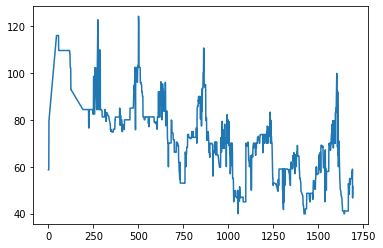

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

In [133]:
# Plot the price 

plt.plot(data_nomiss['Price'])
plt.show()
plt.set_title('Trend')

In [134]:
data_nomiss['Month'] = data_nomiss['Date'].dt.month 
data_nomiss['Year'] = data_nomiss['Date'].dt.year

In [135]:
data_nomiss.head()

,Date,Price,Month,Year
0,2009-04-15,58.650000,4,2009
1,2009-04-16,58.650000,4,2009
2,2009-04-17,58.650000,4,2009
3,2009-04-18,79.640000,4,2009
4,2009-04-19,80.505238,4,2009


In [136]:
agg_data = pd.DataFrame(data_nomiss.groupby(['Year','Month'],as_index=False)['Price'].mean())

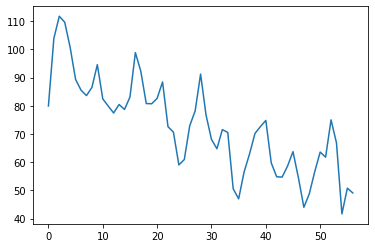

In [137]:
plt.plot(agg_data['Price'])
plt.show()

In [138]:
agg_data[:10]

,Year,Month,Price
0,2009,4,79.922411
1,2009,5,103.838756
2,2009,6,111.713333
3,2009,7,109.580000
4,2009,8,100.662903
5,2009,9,89.320833
6,2009,10,85.522581
7,2009,11,83.595000
8,2009,12,86.476774
9,2010,1,94.561613


In [139]:
# adding the date variable 

agg_data['Date'] = pd.to_datetime(agg_data[['Year','Month']].assign(Day=1)) 

In [140]:
agg_data.head()

,Year,Month,Price,Date
0,2009,4,79.922411,2009-04-01
1,2009,5,103.838756,2009-05-01
2,2009,6,111.713333,2009-06-01
3,2009,7,109.580000,2009-07-01
4,2009,8,100.662903,2009-08-01


In [141]:
agg_data.shape

(57, 4)

In [142]:
np.arange(1,len(agg_data))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [143]:
agg_data['Time_seq'] = np.arange(1,len(agg_data)+1)

In [144]:
agg_data = agg_data.drop(['Year'],axis=1)


In [145]:
agg_data.tail()

,Month,Price,Date,Time_seq
52,8,74.991129,2013-08-01,53
53,9,66.848000,2013-09-01,54
54,10,41.663871,2013-10-01,55
55,11,50.784500,2013-11-01,56
56,12,49.100000,2013-12-01,57


In [146]:
agg_data.set_index('Date',inplace=True)

In [147]:
agg_data

,Month,Price,Time_seq
Date,,,
2009-04-01,4,79.922411,1
2009-05-01,5,103.838756,2
2009-06-01,6,111.713333,3
2009-07-01,7,109.580000,4
2009-08-01,8,100.662903,5
2009-09-01,9,89.320833,6
2009-10-01,10,85.522581,7
2009-11-01,11,83.595000,8
2009-12-01,12,86.476774,9


In [148]:
train = agg_data.loc[agg_data.Time_seq <49,]
test = agg_data.loc[agg_data.Time_seq >=49,]

In [149]:
train

,Month,Price,Time_seq
Date,,,
2009-04-01,4,79.922411,1
2009-05-01,5,103.838756,2
2009-06-01,6,111.713333,3
2009-07-01,7,109.580000,4
2009-08-01,8,100.662903,5
2009-09-01,9,89.320833,6
2009-10-01,10,85.522581,7
2009-11-01,11,83.595000,8
2009-12-01,12,86.476774,9


print(train.shape)
print(test.shape)

In [151]:
print(train.shape)
print(test.shape)

(48, 3)
(9, 3)


In [150]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

2009-04-01 00:00:00
2013-03-01 00:00:00
2013-04-01 00:00:00
2013-12-01 00:00:00


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


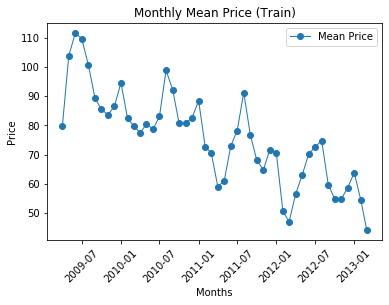

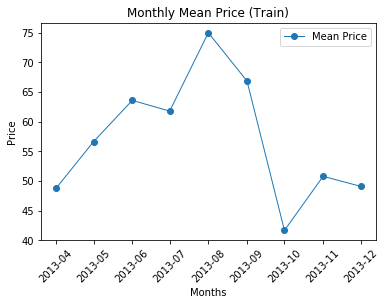

In [152]:
# Visualize train data
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


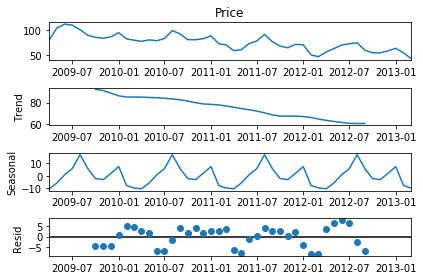

In [154]:
decomposition = seasonal_decompose(train.Price,freq=12)
decomposition.plot()
plt.show()

### Time Series Modelling 

In [155]:
import statsmodels.api as sm # loadig the modules to build the regression model

In [156]:
lm = sm.OLS(train.Price,train.Time_seq)

In [157]:
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              68.38
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                    1.01e-10
Time:                        16:55:12   Log-Likelihood:                         -255.25
No. Observations:                  48   AIC:                                      512.5
Df Residuals:                      47   BIC:                                      514.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [158]:
lm.fittedvalues[:10]

Date
2009-04-01     2.114488
2009-05-01     4.228976
2009-06-01     6.343463
2009-07-01     8.457951
2009-08-01    10.572439
2009-09-01    12.686927
2009-10-01    14.801414
2009-11-01    16.915902
2009-12-01    19.030390
2010-01-01    21.144878
dtype: float64

In [159]:
pred_test = lm.predict(test.Time_seq)

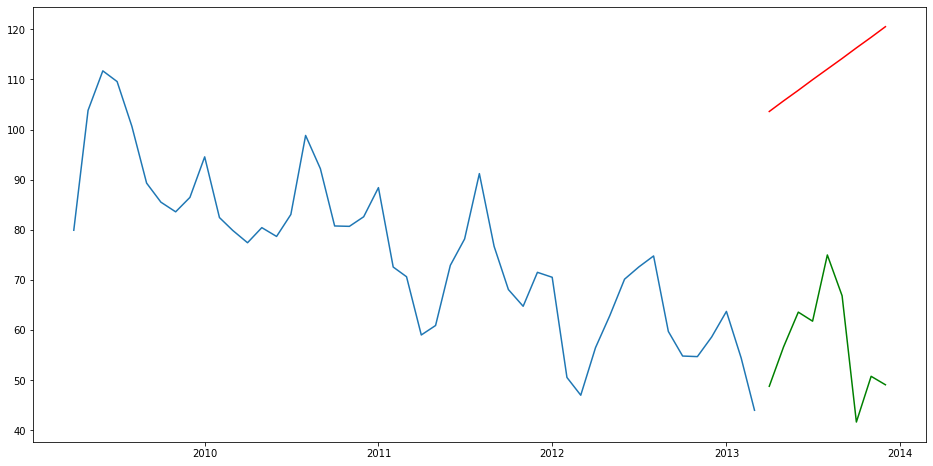

In [160]:
#Plot the predicted data
model_forecast = test.copy()
model_forecast['linear_reg_forecast'] = pred_test
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test',color='green')
plt.plot(model_forecast['linear_reg_forecast'], label='linear_reg_forecast',color = 'red')
plt.show()

In [161]:
model_forecast

,Month,Price,Time_seq,linear_reg_forecast
Date,,,,
2013-04-01,4,48.792000,49,103.609901
2013-05-01,5,56.641290,50,105.724389
2013-06-01,6,63.586333,51,107.838877
2013-07-01,7,61.783548,52,109.953365
2013-08-01,8,74.991129,53,112.067853
2013-09-01,9,66.848000,54,114.182340
2013-10-01,10,41.663871,55,116.296828
2013-11-01,11,50.784500,56,118.411316
2013-12-01,12,49.100000,57,120.525804


In [163]:
from sklearn import metrics

## Evaluating the model

In [164]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
       # print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Train:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Train:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
     #   print('MAPE Train:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        



In [165]:
error_metrics(train.Price,lm.fittedvalues,test.Price,pred_test)

*** Error metrics Train data ***
MAE Train: 40.87788081063272
MSE Train: 2434.2523547808605
RMSE Train: 49.33814300093651
***
 Error metrics Test Data ***
MAE Train: 54.935555724372364
MSE Train: 3172.567218181148
RMSE Train: 56.32554676326851


### Adding the Month variable - to add seasonality Component

In [166]:
train['Month'] = train.Month.astype('category')
test['Month'] = test.Month.astype('category')


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [167]:
train.dtypes

Month       category
Price        float64
Time_seq       int64
dtype: object

In [169]:
train_dummy = pd.get_dummies(train,drop_first=True,dtype='int8')
test_dummy = pd.get_dummies(test,dtype='int8')

In [170]:
print(train_dummy.columns)
print("\n")
print(test_dummy.columns)

print("\n No. of columns in Train Data :{}".format(len(train_dummy.columns)))
print("\n")
print(test_dummy.columns)
print("\n No. of columns in Test Data :{}".format(len(test_dummy.columns)))



Index(['Price', 'Time_seq', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Train Data :13


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Test Data :11


### Alligning the Levels b/w Train and Test Data sets 

In [171]:
train_allign,test_allign = train_dummy.align(test_dummy, join='outer', axis=1,fill_value=0)

In [172]:
train_dummy.head()

,Price,Time_seq,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,
2009-04-01,79.922411,1,0,0,1,0,0,0,0,0,0,0,0
2009-05-01,103.838756,2,0,0,0,1,0,0,0,0,0,0,0
2009-06-01,111.713333,3,0,0,0,0,1,0,0,0,0,0,0
2009-07-01,109.580000,4,0,0,0,0,0,1,0,0,0,0,0
2009-08-01,100.662903,5,0,0,0,0,0,0,1,0,0,0,0


In [173]:
train_allign = sm.add_constant(train_allign)
test_allign = sm.add_constant(test_allign)


In [174]:
print(train_allign.columns)
print("\n")
print(test_allign.columns)

print("\n No. of columns in Train Data :{}".format(len(train_allign.columns)))
print("\n")
print(test_allign.columns)
print("\n No. of columns in Test Data :{}".format(len(test_allign.columns)))



Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Train Data :14


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Test Data :14


In [175]:
lm_season = sm.OLS(train_allign.Price,train_allign.drop(['Price'],axis=1))

In [176]:
lm_season = lm_season.fit()
print(lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     25.11
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.13e-13
Time:                        17:11:43   Log-Likelihood:                -146.27
No. Observations:                  48   AIC:                             318.5
Df Residuals:                      35   BIC:                             342.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9117      3.483     30.122      0.0

In [177]:
predtest_lmTime = lm_season.predict(test_allign.drop(['Price'],axis=1))

In [178]:
error_metrics(train.Price,lm_season.fittedvalues,test.Price,predtest_lmTime)

*** Error metrics Train data ***
MAE Train: 4.119509709951319
MSE Train: 25.958874845233243
RMSE Train: 5.0949852644765565
***
 Error metrics Test Data ***
MAE Train: 7.119109464553619
MSE Train: 65.55446560651741
RMSE Train: 8.09657122530997


### Modelling the time series using simple moving averages(SMA)

In [221]:
window=2
train['SMA_3'] = train['Price'].rolling(window).mean()


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


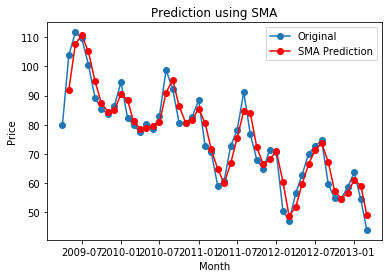

In [222]:
plt.plot(train.index,train.Price,'-o',label = 'Original')
plt.plot(train['SMA_3'],'-o', color='red', label = 'SMA Prediction')

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Prediction using SMA')
plt.legend()
plt.show()

### Forecasting on testdata


In [223]:
history = list(train['SMA_3'].values)
sma_predict = list()

for t in range(len(test)):
    length = len(history)
    yhat =np.mean(history[length-window:length])
    sma_predict.append(yhat)
    history.append(yhat)
    

In [224]:
sma_predict

[54.149608294930886,
 51.68468894009218,
 52.91714861751153,
 52.30091877880186,
 52.60903369815669,
 52.454976238479276,
 52.532004968317985,
 52.49349060339863,
 52.51274778585831]

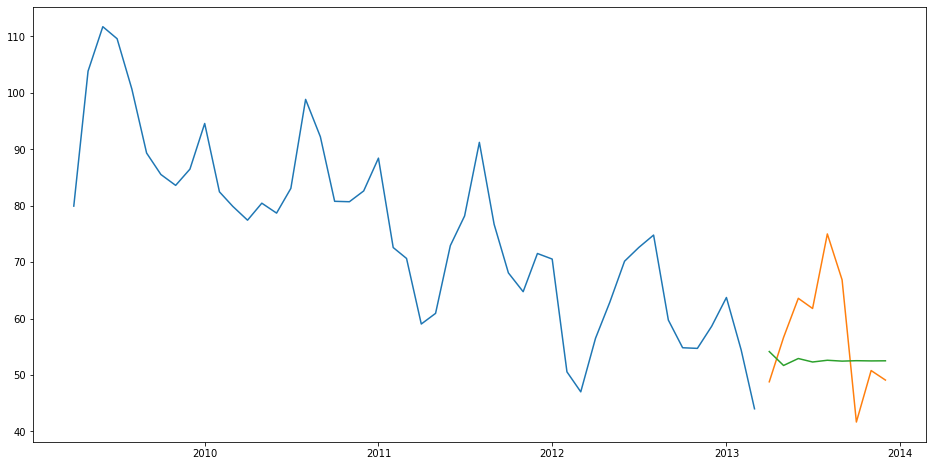

In [225]:
model_forecast=test.copy()
model_forecast['moving_avg_forecast'] = sma_predict
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['moving_avg_forecast'], label='Moving Average Forecast')
plt.show()

In [226]:
test.tail()

,Month,Price,Time_seq
Date,,,
2013-08-01,8,74.991129,53
2013-09-01,9,66.848000,54
2013-10-01,10,41.663871,55
2013-11-01,11,50.784500,56
2013-12-01,12,49.100000,57


In [227]:
pd.DataFrame(error_metrics(train['Price'][2:], train.SMA_3[2:],test['Price'], sma_predict))

*** Error metrics Train data ***
MAE Train: 3.378083884325114
MSE Train: 17.33135986156832
RMSE Train: 4.163094985893106
***
 Error metrics Test Data ***
MAE Train: 9.247890609665683
MSE Train: 121.98053202517791
RMSE Train: 11.044479708215228


""


### Modelling the time series using Exponential moving averages (EMA)


In [201]:
train['EMA_3'] = train.Price.ewm(span=window).mean()


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/share/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


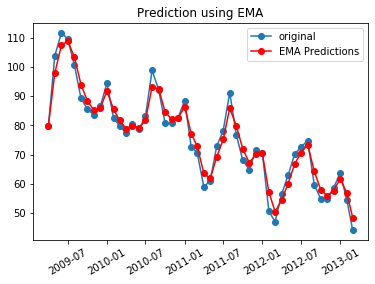

In [202]:
plt.plot(train.index,train.Price,'-o',label = 'original')
plt.plot(train.index,train['EMA_3'],'-o', color='red',label = 'EMA Predictions')

plt.title("Prediction using EMA")
plt.legend()
plt.xticks(rotation=30)
plt.show()

### Forecasting on testdata

In [203]:
history = list(train['EMA_3'].values)
ema_predict = list()

for t in range(len(test)):
    length = len(history)
    print(range(length-window,length))
    yhat=np.mean(history[length-window:length])
    ema_predict.append(yhat)
    history.append(yhat)


range(46, 48)
range(47, 49)
range(48, 50)
range(49, 51)
range(50, 52)
range(51, 53)
range(52, 54)
range(53, 55)
range(54, 56)


In [204]:
error_metrics(train['Price'][2:], train.EMA_3[2:],test['Price'], ema_predict)

*** Error metrics Train data ***
MAE Train: 2.5526137645079405
MSE Train: 9.009849809673325
RMSE Train: 3.0016411860302896
***
 Error metrics Test Data ***
MAE Train: 9.366299232037218
MSE Train: 135.84377079370816
RMSE Train: 11.655203592975464


In [205]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


## Holt Winter’s Exponential Smoothing
Holt-Winters exponential smoothing with trend and additive seasonal component.



/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


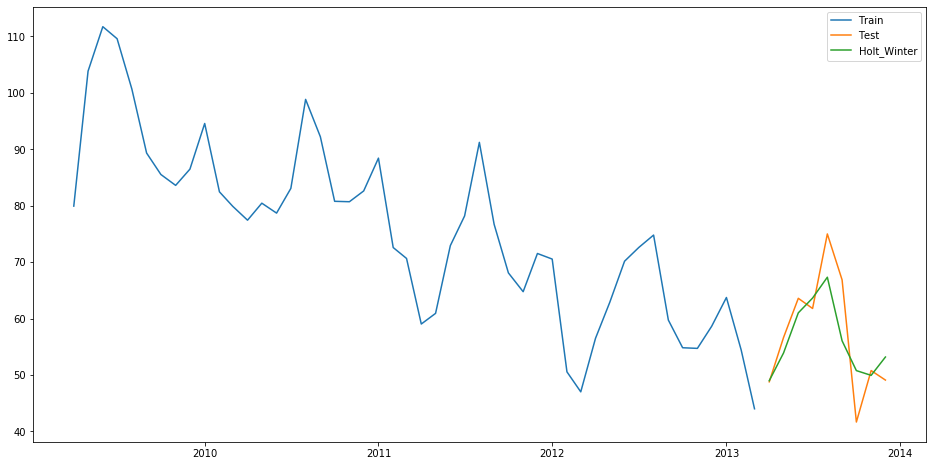

In [208]:

holt_exp_add = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12, seasonal='multiplicative',).fit()
model_forecast['Holt_Winter'] = holt_exp_add.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [209]:
error_metrics(train['Price'][2:], holt_exp_add.forecast(len(train[2:])),test['Price'], 
              holt_exp_add.forecast(len(test)))


*** Error metrics Train data ***
MAE Train: 21.91356707453588
MSE Train: 663.4043141855835
RMSE Train: 25.756636313493722
***
 Error metrics Test Data ***
MAE Train: 4.430304545541553
MSE Train: 32.594698653966205
RMSE Train: 5.709176705442406


## Holt-Winters exponential smoothing additive trend with multiplicative seasonal component.

In [210]:
holt_exp_mul = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 , seasonal='multiplicative',trend='add').fit()


/usr/share/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


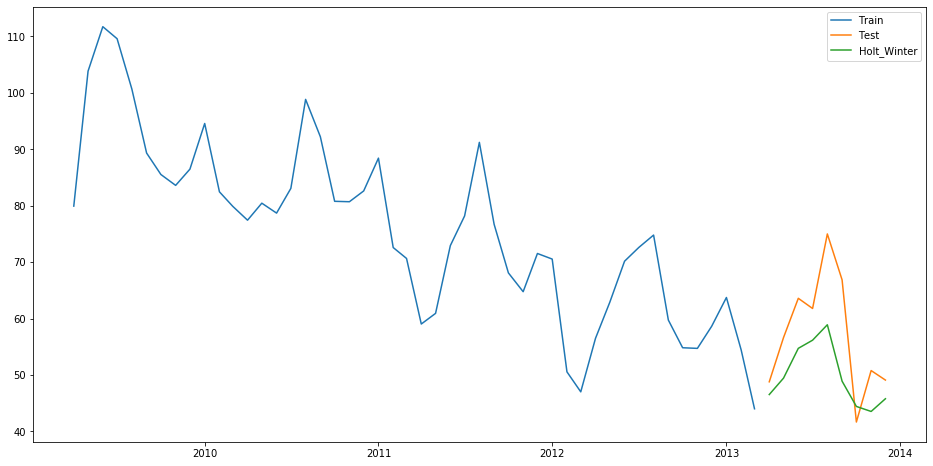

In [211]:
model_forecast['Holt_Winter'] = holt_exp_mul.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [212]:
error_metrics(train['Price'][2:], holt_exp_mul.forecast(len(train[2:])),test['Price'], 
              holt_exp_mul.forecast(len(test)))



*** Error metrics Train data ***
MAE Train: 42.43126698136754
MSE Train: 1889.1974456344606
RMSE Train: 43.464899006375944
***
 Error metrics Test Data ***
MAE Train: 7.921854089419522
MSE Train: 91.02282995092172
RMSE Train: 9.540588553696345


# To Be Continued ....